#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.
 
### CHAPTER 12
**CH12 Returns on a company stock and market returns**

version 1.0 2021-05-31
 
 

In [1]:
import os
import sys
import warnings
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from mizani.breaks import date_breaks
from mizani.formatters import date_format
from mizani.formatters import percent_format
from plotnine import *
from stargazer.stargazer import Stargazer

warnings.filterwarnings("ignore")


In [2]:
stock_data = pd.read_csv("/workspaces/codespaces-jupyter/data/ready_sp500_45_cos.csv")
sp500_index = pd.read_csv("/workspaces/codespaces-jupyter/data/ready_sp500_index.csv")

In [3]:
stock_data

,ticker,ref.date,price.open,price.close,price.adjusted,price.low,price.high,volume
0,ACN,2001-07-19,15.100000,15.170000,11.497672,15.000000,15.290000,34994300.0
1,ACN,2001-07-20,15.050000,15.010000,11.376402,14.800000,15.050000,9238500.0
2,ACN,2001-07-23,15.000000,15.000000,11.368821,14.550000,15.010000,7501000.0
3,ACN,2001-07-24,14.950000,14.860000,11.262713,14.700000,14.970000,3537300.0
4,ACN,2001-07-25,14.700000,14.950000,11.330926,14.650000,14.950000,4208100.0
...,...,...,...,...,...,...,...,...
304854,XLNX,2018-12-26,79.889999,85.220001,84.371185,79.669998,85.279999,2780600.0
304855,XLNX,2018-12-27,83.639999,84.300003,83.460358,81.070000,84.419998,2684100.0
304856,XLNX,2018-12-28,84.750000,84.339996,83.499954,83.580002,85.910004,1711400.0
304857,XLNX,2018-12-31,85.250000,85.169998,84.321671,83.910004,85.730003,1433400.0


In [4]:
stock_data["ticker"].unique()

array(['ACN', 'ADBE', 'AMD', 'AKAM', 'ADS', 'APH', 'ADI', 'ANSS', 'AAPL',
       'AMAT', 'ANET', 'ADSK', 'ADP', 'AVGO', 'BR', 'CDNS', 'CSCO',
       'CTXS', 'CTSH', 'GLW', 'DXC', 'FFIV', 'FIS', 'FISV', 'FLT', 'FLIR',
       'FTNT', 'IT', 'GPN', 'HPE', 'HPQ', 'INTC', 'IBM', 'INTU', 'IPGP',
       'JKHY', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'LDOS', 'MA', 'MXIM',
       'MCHP', 'MU', 'MSFT', 'MSI', 'NTAP', 'NVDA', 'ORCL', 'PAYX',
       'PYPL', 'QRVO', 'QCOM', 'CRM', 'STX', 'SWKS', 'SYMC', 'SNPS',
       'TEL', 'TXN', 'TSS', 'VRSN', 'V', 'WDC', 'WU', 'XRX', 'XLNX'],
      dtype=object)

In [5]:

APL = stock_data[stock_data["ticker"] == "AAPL"]

p_APL = (
    APL[["ref.date", "price.close"]]
    .rename(columns={"ref.date": "date"})
    .reset_index(drop=True)
)

p_APL["date"] = pd.to_datetime(p_APL["date"])

In [6]:
p_SP500 = (
    sp500_index[["ref.date", "price.close"]]
    .rename(columns={"ref.date": "date"})
    .reset_index(drop=True)
)

p_SP500["date"] = pd.to_datetime(p_SP500["date"])

In [7]:
# Ensure both 'date' columns are datetime
p_APL["date"] = pd.to_datetime(p_APL["date"])
p_SP500["date"] = pd.to_datetime(p_SP500["date"])

data_daily = (
    pd.merge(p_SP500, p_APL, how="inner", on="date")
    .rename(columns={"price.close_x": "p_SP500", "price.close_y": "p_APL"})
    .reset_index(drop=True)
)

In [8]:
data_daily["year"] = data_daily["date"].dt.year
data_daily["month"] = data_daily["date"].dt.month

In [9]:
data_daily.to_csv("stock-prices-daily_apple.csv")

# PART I: Graphs

In [10]:
data_daily["lnp_APL"] = data_daily["p_APL"].map(lambda x: np.log(x))
data_daily["lnp_SP500"] = data_daily["p_SP500"].map(lambda x: np.log(x))

In [11]:
limits = datetime(1998, 1, 1), datetime(2018, 1, 1)
breaks = date_breaks("2 year")
data_daily = data_daily.reset_index(drop=True)

### Figure 12.2 Stock prices, daily time series

For time series data, plotnine wants the index to start from 0

In [12]:
data_daily

,date,p_SP500,p_APL,year,month,lnp_APL,lnp_SP500
0,1997-12-29,953.349976,0.468750,1997,12,-0.757686,6.859982
1,1997-12-30,970.840027,0.470982,1997,12,-0.752935,6.878162
2,1997-12-31,970.429993,0.468750,1997,12,-0.757686,6.877739
3,1998-01-02,975.039978,0.580357,1998,1,-0.544112,6.882478
4,1998-01-05,977.070007,0.566964,1998,1,-0.567459,6.884558
...,...,...,...,...,...,...,...
5282,2018-12-26,2467.699951,157.169998,2018,12,5.057328,7.811042
5283,2018-12-27,2488.830078,156.149994,2018,12,5.050817,7.819568
5284,2018-12-28,2485.739990,156.229996,2018,12,5.051329,7.818326
5285,2018-12-31,2506.850098,157.740005,2018,12,5.060948,7.826782


(a) Microsoft

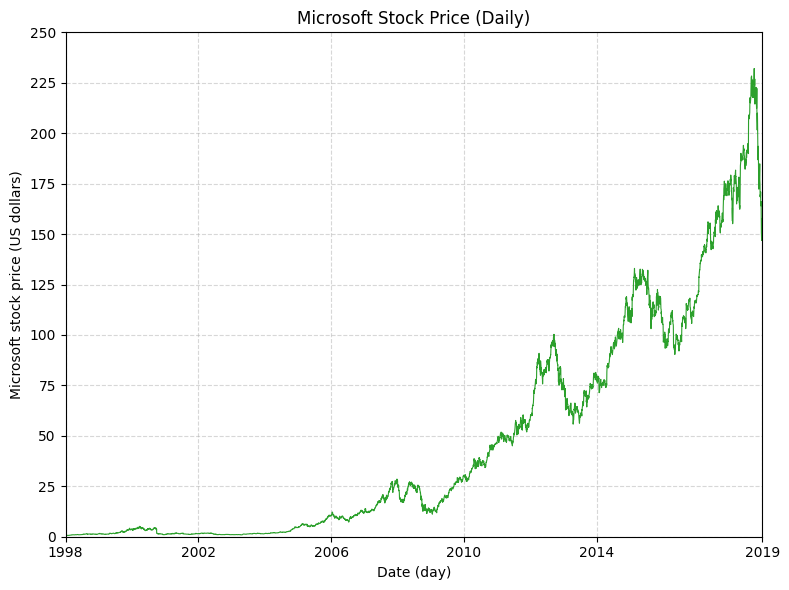

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(data_daily["date"], data_daily["p_APL"], color="tab:green", linewidth=0.8)
plt.ylim(0,250)
plt.yticks(np.arange(0, 251, 25))
plt.xlim(limits)
years = np.linspace(1998, 2019, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (day)")
plt.ylabel("Microsoft stock price (US dollars)")
plt.title("Microsoft Stock Price (Daily)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

(b) S&P500 index

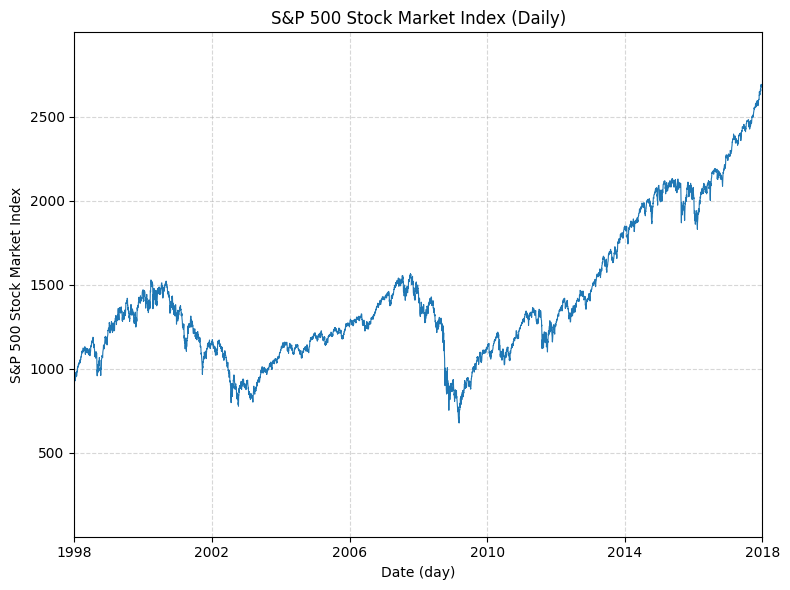

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(data_daily["date"], data_daily["p_SP500"], color="tab:blue", linewidth=0.8)
plt.ylim(0, 3001)
plt.yticks(np.arange(500, 3000, 500))
plt.xlim(limits)
years = np.linspace(1998, 2018, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (day)")
plt.ylabel("S&P 500 Stock Market Index")
plt.title("S&P 500 Stock Market Index (Daily)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [20]:
%pip install arch
from arch.unitroot import PhillipsPerron

Note: you may need to restart the kernel to use updated packages.


### Phillips Perron Unit Root

testing whether the Microsoft stock price series is stationary or not. If the test result shows a unit root, the series is non-stationary (its mean and variance change over time)


The Phillips-Perron test checks if a time series is stationary or has a unit root (is non-stationary).

If a series has a unit root, its mean and variance can change over time (like a random walk).
If it is stationary, its statistical properties stay the same over time.
In simple words:
Phillips-Perron tells you if your data (like stock prices) "wanders" over time or stays around a constant average. This is important for deciding how to model and forecast time series data.

In [21]:
print(PhillipsPerron(data_daily["p_APL"], lags=32, test_type="rho", trend="n"))
print(PhillipsPerron(data_daily["p_APL"], lags=32, test_type="rho", trend="c"))
print(PhillipsPerron(data_daily["p_APL"], lags=32, test_type="rho", trend="ct"))


     Phillips-Perron Test (Z-rho)    
Test Statistic                  1.570
P-value                         0.965
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                  0.281
P-value                         0.967
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -7.445
P-value                         0.632
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

In [22]:
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="n")),
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="c")),
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="ct")),

     Phillips-Perron Test (Z-rho)    
Test Statistic                  0.918
P-value                         0.894
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.314
P-value                         0.939
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -3.912
P-value                         0.896
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

(None,)

In [23]:
data_daily

,date,p_SP500,p_APL,year,month,lnp_APL,lnp_SP500
0,1997-12-29,953.349976,0.468750,1997,12,-0.757686,6.859982
1,1997-12-30,970.840027,0.470982,1997,12,-0.752935,6.878162
2,1997-12-31,970.429993,0.468750,1997,12,-0.757686,6.877739
3,1998-01-02,975.039978,0.580357,1998,1,-0.544112,6.882478
4,1998-01-05,977.070007,0.566964,1998,1,-0.567459,6.884558
...,...,...,...,...,...,...,...
5282,2018-12-26,2467.699951,157.169998,2018,12,5.057328,7.811042
5283,2018-12-27,2488.830078,156.149994,2018,12,5.050817,7.819568
5284,2018-12-28,2485.739990,156.229996,2018,12,5.051329,7.818326
5285,2018-12-31,2506.850098,157.740005,2018,12,5.060948,7.826782


In [26]:
data_daily["l.p_APL"] = data_daily["p_APL"].shift() #shift down
data_daily["l.p_SP500"] = data_daily["p_SP500"].shift() #shift down
data_daily["d.p_APL"] = data_daily["p_APL"] - data_daily["l.p_APL"] #diff
data_daily["d.p_SP500"] = data_daily["p_SP500"] - data_daily["l.p_SP500"] #diff
data_daily["PctRetAPL"] = data_daily["d.p_APL"] / data_daily["l.p_APL"] * 100 #perc
data_daily["PctRetSP500"] = data_daily["d.p_SP500"] / data_daily["l.p_SP500"] * 100 #perc
data_daily

,date,p_SP500,p_APL,year,month,lnp_APL,lnp_SP500,l.p_APL,l.p_SP500,d.p_APL,d.p_SP500,PctRetMSFT,PctRetSP500,PctRetAPL
0,1997-12-29,953.349976,0.468750,1997,12,-0.757686,6.859982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-12-30,970.840027,0.470982,1997,12,-0.752935,6.878162,0.468750,953.349976,0.002232,17.490051,0.476160,1.834589,0.476160
2,1997-12-31,970.429993,0.468750,1997,12,-0.757686,6.877739,0.470982,970.840027,-0.002232,-0.410034,-0.473903,-0.042235,-0.473903
3,1998-01-02,975.039978,0.580357,1998,1,-0.544112,6.882478,0.468750,970.429993,0.111607,4.609985,23.809493,0.475046,23.809493
4,1998-01-05,977.070007,0.566964,1998,1,-0.567459,6.884558,0.580357,975.039978,-0.013393,2.030029,-2.307717,0.208200,-2.307717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5282,2018-12-26,2467.699951,157.169998,2018,12,5.057328,7.811042,146.830002,2351.100098,10.339996,116.599853,7.042155,4.959374,7.042155
5283,2018-12-27,2488.830078,156.149994,2018,12,5.050817,7.819568,157.169998,2467.699951,-1.020004,21.130127,-0.648981,0.856268,-0.648981
5284,2018-12-28,2485.739990,156.229996,2018,12,5.051329,7.818326,156.149994,2488.830078,0.080002,-3.090088,0.051234,-0.124158,0.051234
5285,2018-12-31,2506.850098,157.740005,2018,12,5.060948,7.826782,156.229996,2485.739990,1.510009,21.110108,0.966530,0.849248,0.966530


In [27]:
data_daily["d.lnp_APL"] = np.log(data_daily["p_APL"]) - np.log(data_daily["p_APL"].shift())
data_daily["d.lnp_SP500"] = np.log(data_daily["p_SP500"]) - np.log(data_daily["p_SP500"].shift())

In [28]:
data_monthly = (
    data_daily[["date", "year", "month", "p_SP500", "p_APL"]]
    .groupby(data_daily["date"].dt.to_period("M"))
    .last()
    .reset_index(drop=True)
)
data_monthly


,date,year,month,p_SP500,p_APL
0,1997-12-31,1997,12,970.429993,0.468750
1,1998-01-30,1998,1,980.280029,0.654018
2,1998-02-27,1998,2,1049.339966,0.843750
3,1998-03-31,1998,3,1101.750000,0.982143
4,1998-04-30,1998,4,1111.750000,0.977679
...,...,...,...,...,...
249,2018-09-28,2018,9,2913.979980,225.740005
250,2018-10-31,2018,10,2711.739990,218.860001
251,2018-11-30,2018,11,2760.169922,178.580002
252,2018-12-31,2018,12,2506.850098,157.740005


In [29]:
data_monthly["l.p_APL"] = data_monthly["p_APL"].shift()
data_monthly["l.p_SP500"] = data_monthly["p_SP500"].shift()
data_monthly["d.p_APL"] = data_monthly["p_APL"] - data_monthly["l.p_APL"]
data_monthly["d.p_SP500"] = data_monthly["p_SP500"] - data_monthly["l.p_SP500"]
data_monthly["PctRetMSFT"] = data_monthly["d.p_APL"] / data_monthly["l.p_APL"] * 100
data_monthly["PctRetSP500"] = (data_monthly["d.p_SP500"] / data_monthly["l.p_SP500"] * 100)

In [30]:
data_monthly["d.lnp_APL"] = np.log(data_monthly["p_APL"]) - np.log(
    data_monthly["p_APL"].shift()
)
data_monthly["d.lnp_SP500"] = np.log(data_monthly["p_SP500"]) - np.log(
    data_monthly["p_SP500"].shift()
)

In [31]:
data_daily

,date,p_SP500,p_APL,year,month,lnp_APL,lnp_SP500,l.p_APL,l.p_SP500,d.p_APL,d.p_SP500,PctRetMSFT,PctRetSP500,PctRetAPL,d.lnp_APL,d.lnp_SP500
0,1997-12-29,953.349976,0.468750,1997,12,-0.757686,6.859982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-12-30,970.840027,0.470982,1997,12,-0.752935,6.878162,0.468750,953.349976,0.002232,17.490051,0.476160,1.834589,0.476160,0.004750,0.018180
2,1997-12-31,970.429993,0.468750,1997,12,-0.757686,6.877739,0.470982,970.840027,-0.002232,-0.410034,-0.473903,-0.042235,-0.473903,-0.004750,-0.000422
3,1998-01-02,975.039978,0.580357,1998,1,-0.544112,6.882478,0.468750,970.429993,0.111607,4.609985,23.809493,0.475046,23.809493,0.213574,0.004739
4,1998-01-05,977.070007,0.566964,1998,1,-0.567459,6.884558,0.580357,975.039978,-0.013393,2.030029,-2.307717,0.208200,-2.307717,-0.023348,0.002080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5282,2018-12-26,2467.699951,157.169998,2018,12,5.057328,7.811042,146.830002,2351.100098,10.339996,116.599853,7.042155,4.959374,7.042155,0.068053,0.048403
5283,2018-12-27,2488.830078,156.149994,2018,12,5.050817,7.819568,157.169998,2467.699951,-1.020004,21.130127,-0.648981,0.856268,-0.648981,-0.006511,0.008526
5284,2018-12-28,2485.739990,156.229996,2018,12,5.051329,7.818326,156.149994,2488.830078,0.080002,-3.090088,0.051234,-0.124158,0.051234,0.000512,-0.001242
5285,2018-12-31,2506.850098,157.740005,2018,12,5.060948,7.826782,156.229996,2485.739990,1.510009,21.110108,0.966530,0.849248,0.966530,0.009619,0.008457


In [32]:
data_monthly

,date,year,month,p_SP500,p_APL,l.p_APL,l.p_SP500,d.p_APL,d.p_SP500,PctRetMSFT,PctRetSP500,d.lnp_APL,d.lnp_SP500
0,1997-12-31,1997,12,970.429993,0.468750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-01-30,1998,1,980.280029,0.654018,0.468750,970.429993,0.185268,9.850036,39.523840,1.015018,0.333065,0.010099
2,1998-02-27,1998,2,1049.339966,0.843750,0.654018,980.280029,0.189732,69.059937,29.010211,7.044919,0.254721,0.068078
3,1998-03-31,1998,3,1101.750000,0.982143,0.843750,1049.339966,0.138393,52.410034,16.402133,4.994571,0.151881,0.048738
4,1998-04-30,1998,4,1111.750000,0.977679,0.982143,1101.750000,-0.004464,10.000000,-0.454516,0.907647,-0.004556,0.009036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2018-09-28,2018,9,2913.979980,225.740005,227.630005,2901.520020,-1.890000,12.459960,-0.830295,0.429429,-0.008338,0.004285
250,2018-10-31,2018,10,2711.739990,218.860001,225.740005,2913.979980,-6.880004,-202.239990,-3.047756,-6.940336,-0.030952,-0.071929
251,2018-11-30,2018,11,2760.169922,178.580002,218.860001,2711.739990,-40.279999,48.429932,-18.404459,1.785936,-0.203396,0.017702
252,2018-12-31,2018,12,2506.850098,157.740005,178.580002,2760.169922,-20.839997,-253.319824,-11.669838,-9.177689,-0.124089,-0.096265


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(data_monthly["date"], data_monthly["p_APL"], color="tab:green", linewidth=0.8)
plt.ylim(0, 121)
plt.yticks(np.arange(0, 120, 20))
plt.xlim(limits)
years = np.linspace(1998, 2018, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (Month)")
plt.ylabel("Microsoft stock price (US dollars)", x="Date (Month)")
plt.title("Microsoft Stock Price (Monthly)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

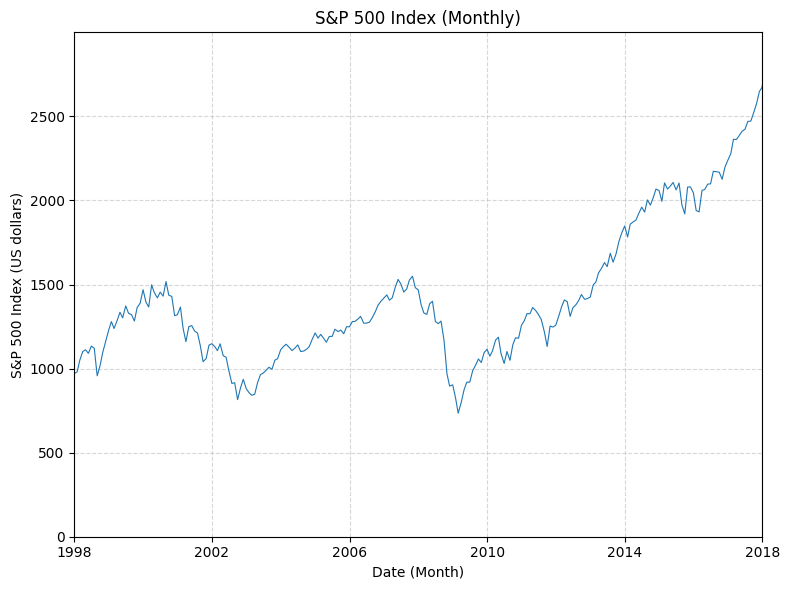

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(data_monthly["date"], data_monthly["p_SP500"], color="tab:blue", linewidth=0.8)
plt.ylim(0, 3000)
plt.yticks(np.arange(0, 3000, 500))
plt.xlim(limits)
years = np.linspace(1998, 2018, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (Month)")
plt.ylabel("S&P 500 Index (US dollars)", x="Date (Month)")
plt.title("S&P 500 Index (Monthly)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [35]:
print(PhillipsPerron(data_daily["p_APL"], lags=32, test_type="rho", trend="n"))
print(PhillipsPerron(data_daily["p_APL"], lags=32, test_type="rho", trend="c"))
print(PhillipsPerron(data_daily["p_APL"], lags=32, test_type="rho", trend="ct"))


     Phillips-Perron Test (Z-rho)    
Test Statistic                  1.570
P-value                         0.965
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                  0.281
P-value                         0.967
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -7.445
P-value                         0.632
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

In [36]:
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="n"))
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="c"))
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="ct"))


     Phillips-Perron Test (Z-rho)    
Test Statistic                  0.918
P-value                         0.894
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.314
P-value                         0.939
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -3.912
P-value                         0.896
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

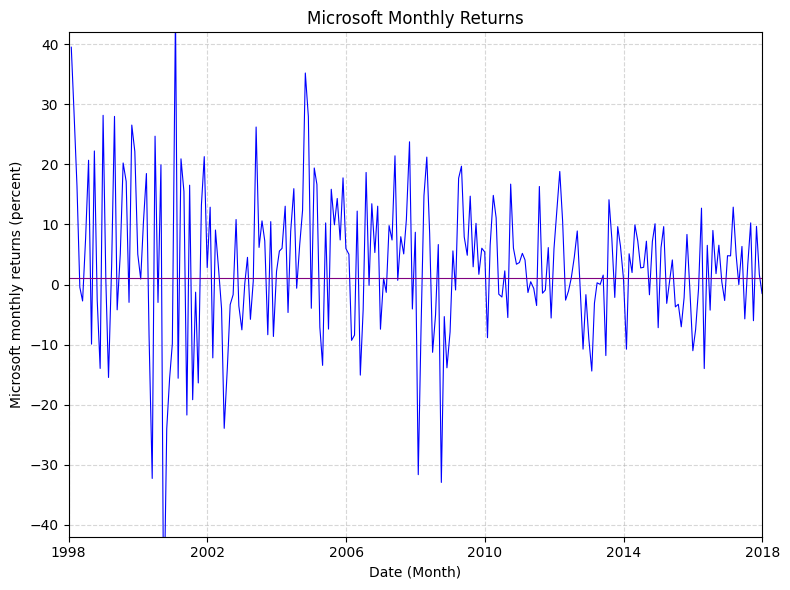

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(data_monthly["date"], data_monthly["PctRetMSFT"], color="blue", linewidth=0.8)
plt.axhline(y=1.13, color="purple", linewidth=0.8)
plt.ylim(-42, 42)
plt.xlim(limits)
years = np.linspace(limits[0].year, limits[1].year, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (Month)")
plt.ylabel("Microsoft monthly returns (percent)")
plt.title("Microsoft Monthly Returns")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


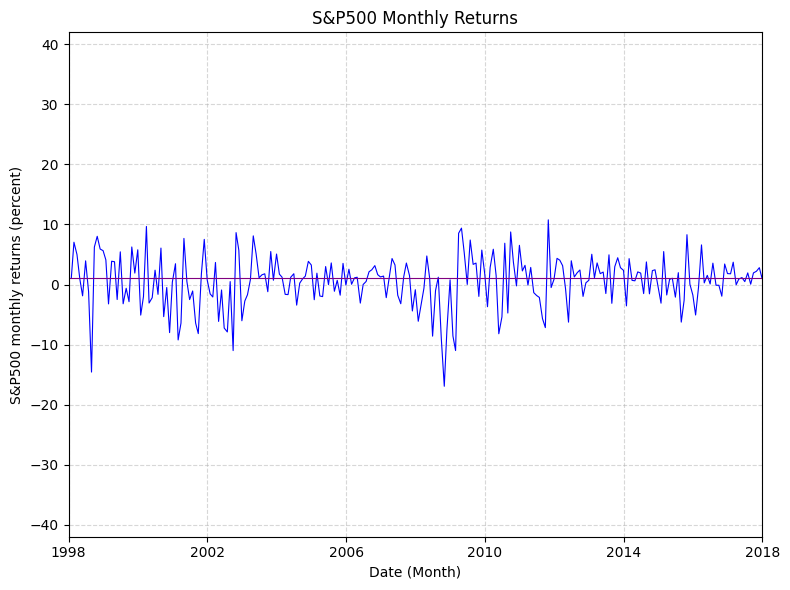

In [38]:
plt.figure(figsize=(8,6))
plt.plot(data_monthly["date"], data_monthly["PctRetSP500"], color="blue", linewidth=0.8)
plt.axhline(y=1.13, color="purple", linewidth=0.8)
plt.ylim(-42, 42)
plt.xlim(limits)
years = np.linspace(limits[0].year, limits[1].year, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (Month)")
plt.ylabel("S&P500 monthly returns (percent)")
plt.title("S&P500 Monthly Returns")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [39]:
data_monthly.head(2)

,date,year,month,p_SP500,p_APL,l.p_APL,l.p_SP500,d.p_APL,d.p_SP500,PctRetMSFT,PctRetSP500,d.lnp_APL,d.lnp_SP500
0,1997-12-31,1997,12,970.429993,0.468750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-01-30,1998,1,980.280029,0.654018,0.46875,970.429993,0.185268,9.850036,39.52384,1.015018,0.333065,0.010099


In [40]:
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetMSFT"], lags=5, test_type="rho", trend="n"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetMSFT"], lags=5, test_type="rho", trend="c"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetMSFT"], lags=5, test_type="rho", trend="ct"
    )
)


     Phillips-Perron Test (Z-rho)    
Test Statistic               -243.529
P-value                         0.000
Lags                                5
-------------------------------------

Trend: No Trend
Critical Values: -12.12 (1%), -7.03 (5%), -4.96 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -242.422
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -20.16 (1%), -13.87 (5%), -11.10 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -243.733
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -28.45 (1%),

In [41]:
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetSP500"], lags=5, test_type="rho", trend="n"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetSP500"], lags=5, test_type="rho", trend="c"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetSP500"], lags=5, test_type="rho", trend="ct"
    )
)


     Phillips-Perron Test (Z-rho)    
Test Statistic               -235.649
P-value                         0.000
Lags                                5
-------------------------------------

Trend: No Trend
Critical Values: -12.12 (1%), -7.03 (5%), -4.96 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -234.998
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -20.16 (1%), -13.87 (5%), -11.10 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -234.488
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -28.45 (1%),

### Table 12.1 Descriptive statistics on monthly returns

In [42]:
results = (
    data_monthly[["PctRetMSFT", "PctRetSP500"]]
    .describe()
    .T[["min", "max", "mean", "std", "count"]]
    .rename(columns={"std": "sd", "count": "N"})
)
results.index = ["Monthly returns on Microsoft (%)", "Monthly returns on S&P500 (%)"]
results.round(1)


,min,max,mean,sd,N
Monthly returns on Microsoft (%),-57.7,45.4,3.1,12.3,253.0
Monthly returns on S&P500 (%),-16.9,10.8,0.5,4.3,253.0


In [43]:
reg1 = smf.ols("PctRetMSFT ~ PctRetSP500", data=data_monthly).fit()

reg2 = smf.ols("d_lnp_APL ~ d_lnp_SP500", data=data_monthly.rename(
        columns={"d.lnp_APL": "d_lnp_APL", "d.lnp_SP500": "d_lnp_SP500"}
    ),
).fit()


reg3 = smf.ols("PctRetMSFT ~ PctRetSP500", data=data_daily).fit()

reg4 = smf.ols("d_lnp_APL ~ d_lnp_SP500", data=data_daily.rename(
        columns={"d.lnp_APL": "d_lnp_APL", "d.lnp_SP500": "d_lnp_SP500"}
    ),
).fit()


In [44]:
print(reg1.get_robustcov_results(cov_type="HC1").summary())


                            OLS Regression Results                            
Dep. Variable:             PctRetMSFT   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     66.40
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           1.75e-14
Time:                        23:58:13   Log-Likelihood:                -959.67
No. Observations:                 253   AIC:                             1923.
Df Residuals:                     251   BIC:                             1930.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.4619      0.697      3.533      

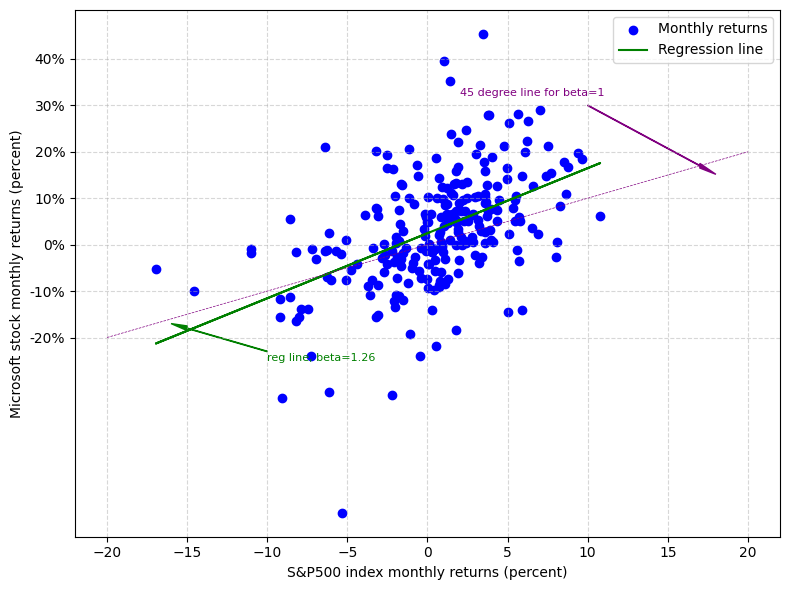

In [45]:
from numpy import polyfit

plt.figure(figsize=(8, 6))
plt.scatter(data_monthly["PctRetSP500"], data_monthly["PctRetMSFT"] / 100, color="blue", label="Monthly returns")
# Regression line
x = data_monthly["PctRetSP500"].dropna()
y = (data_monthly["PctRetMSFT"] / 100).dropna()
m, b = polyfit(x, y, 1)
plt.plot(x, m * x + b, color="green", label="Regression line")

# 45 degree line for beta=1
plt.plot([-20, 20], [-0.2, 0.2], color="purple", linestyle="dashed", linewidth=0.5)
plt.annotate("45 degree line for beta=1", xy=(2, 0.32), color="purple", fontsize=8)

# Arrow for reg line, beta=1.26
plt.arrow(-10, -0.23, -5, 0.05, color="green", head_width=0.01, head_length=1)
plt.annotate("reg line, beta=1.26", xy=(-10, -0.25), color="green", fontsize=8)

# Arrow for 45 degree line
plt.arrow(10, 0.3, 7, -0.13, color="purple", head_width=0.01, head_length=1)

plt.xlabel("S&P500 index monthly returns (percent)")
plt.ylabel("Microsoft stock monthly returns (percent)")
plt.yticks(np.arange(-0.2, 0.41, 0.1), [f"{int(v*100)}%" for v in np.arange(-0.2, 0.41, 0.1)])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [46]:
data_monthly_tidy = pd.melt(
    data_monthly[["date", "PctRetMSFT", "PctRetSP500"]],
    id_vars=["date"],
    var_name="index",
    value_name="pct_return",
)

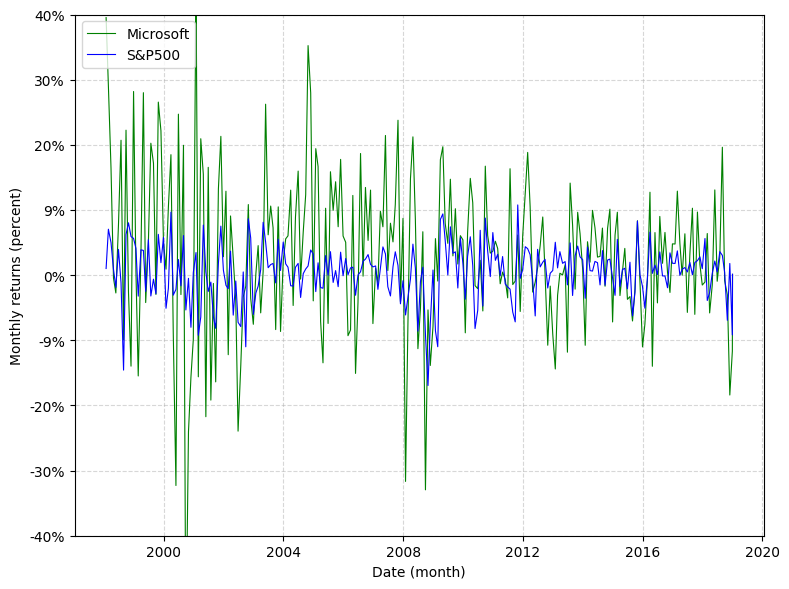

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))

for label, color in zip(["PctRetMSFT", "PctRetSP500"], ["green", "blue"]):
    subset = data_monthly_tidy[data_monthly_tidy["index"] == label]
    ax.plot(subset["date"], subset["pct_return"] / 100, label="Microsoft" if label == "PctRetMSFT" else "S&P500", color=color, linewidth=0.8)

ax.set_xlabel("Date (month)")
ax.set_ylabel("Monthly returns (percent)")
ax.set_ylim(-0.40, 0.40)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{int(y*100)}%"))
ax.legend(loc="upper left")
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [48]:
data_monthly_tidy_17_18 = data_monthly_tidy.loc[
    data_monthly_tidy["date"] > "2017-01-01"
]

In [49]:
breaks = date_breaks('6 month')
limits = datetime(2017, 1, 1), datetime(2019, 1, 1)

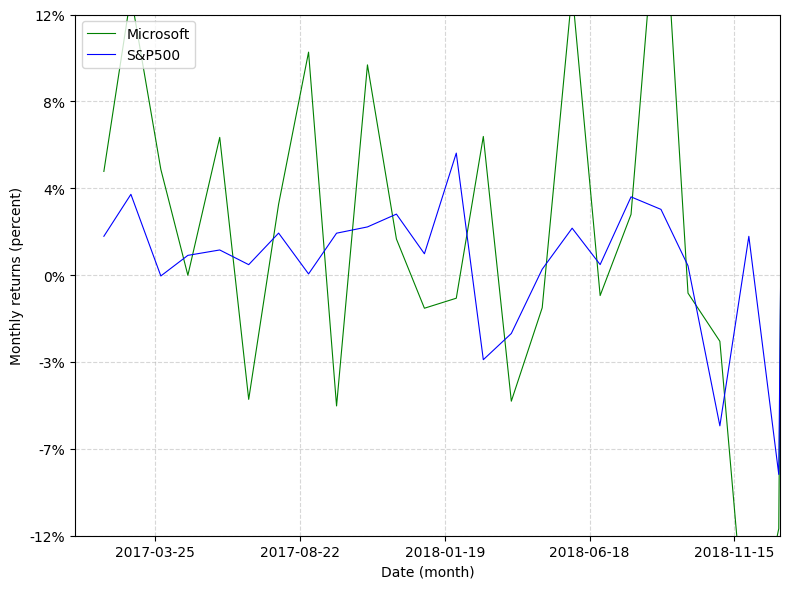

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))

# Microsoft
msft = data_monthly_tidy_17_18[data_monthly_tidy_17_18["index"] == "PctRetMSFT"]
ax.plot(msft["date"], msft["pct_return"] / 100, label="Microsoft", color="green", linewidth=0.8)

# S&P500
sp500 = data_monthly_tidy_17_18[data_monthly_tidy_17_18["index"] == "PctRetSP500"]
ax.plot(sp500["date"], sp500["pct_return"] / 100, label="S&P500", color="blue", linewidth=0.8)

ax.set_xlabel("Date (month)")
ax.set_ylabel("Monthly returns (percent)")
ax.set_ylim(-0.12, 0.12)
ax.set_xlim(limits)
ax.set_yticks(np.arange(-0.12, 0.13, 0.04))
ax.set_yticklabels([f"{int(v*100)}%" for v in np.arange(-0.12, 0.13, 0.04)])
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.legend(loc="upper left")
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [51]:
print(reg1.get_robustcov_results(cov_type="HC1").summary())


                            OLS Regression Results                            
Dep. Variable:             PctRetMSFT   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     66.40
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           1.75e-14
Time:                        23:58:14   Log-Likelihood:                -959.67
No. Observations:                 253   AIC:                             1923.
Df Residuals:                     251   BIC:                             1930.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.4619      0.697      3.533      

In [52]:
print(reg2.get_robustcov_results(cov_type="HC1").summary())


                            OLS Regression Results                            
Dep. Variable:              d_lnp_APL   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     51.24
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           8.98e-12
Time:                        23:58:14   Log-Likelihood:                 193.80
No. Observations:                 253   AIC:                            -383.6
Df Residuals:                     251   BIC:                            -376.5
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0177      0.007      2.392      

In [53]:
print(reg3.get_robustcov_results(cov_type="HC1").summary())


                            OLS Regression Results                            
Dep. Variable:             PctRetMSFT   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     1061.
Date:                Tue, 22 Jul 2025   Prob (F-statistic):          3.04e-212
Time:                        23:58:14   Log-Likelihood:                -12016.
No. Observations:                5286   AIC:                         2.404e+04
Df Residuals:                    5284   BIC:                         2.405e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1194      0.032      3.676      

In [54]:
print(reg4.get_robustcov_results(cov_type="HC1").summary())


                            OLS Regression Results                            
Dep. Variable:              d_lnp_APL   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     941.0
Date:                Tue, 22 Jul 2025   Prob (F-statistic):          2.49e-190
Time:                        23:58:14   Log-Likelihood:                 12124.
No. Observations:                5286   AIC:                        -2.424e+04
Df Residuals:                    5284   BIC:                        -2.423e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0009      0.000      2.640      

In [55]:
reg1 = smf.ols("PctRetMSFT ~ PctRetSP500", data=data_monthly).fit()
reg2 = smf.ols(
    "d_lnp_APL ~ d_lnp_SP500",
    data=data_monthly.rename(
        columns={"d.lnp_APL": "d_lnp_APL", "d.lnp_SP500": "d_lnp_SP500"}
    ),
).fit()
reg3 = smf.ols("PctRetMSFT ~ PctRetSP500", data=data_daily).fit()
reg4 = smf.ols(
    "d_lnp_APL ~ d_lnp_SP500",
    data=data_daily.rename(
        columns={"d.lnp_APL": "d_lnp_APL", "d.lnp_SP500": "d_lnp_SP500"}
    ),
).fit()


### Table 12.3 Returns on Microsoft and market returns: alternative measurements

In [56]:
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["PctRetSP500", "d_lnp_SP500", "Intercept"])
stargazer.rename_covariates(
    {
        "Intercept": "Constant",
        "PctRetSP500": "S&P500 returns",
        "d_lnp_SP500": "S&P500 returns",
    }
)
stargazer.custom_columns(
    [
        "Monthly pct change",
        "Monthly log change",
        "Daily pct change",
        "Daily log change",
    ],
    [1, 1, 1, 1],
)
stargazer
